In [1]:
from IPython.display import Markdown, display
import requests
import json
import nest_asyncio
from bs4 import BeautifulSoup
import markdown
#Get openai key with dotenv
from dotenv import load_dotenv
import os

load_dotenv()
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")

In [2]:
url="https://tu-delft-dcc.github.io/"

Beautiful Soup (as baseline)

In [5]:
# Send a GET request to the URL
response = requests.get(url)

# Create a BeautifulSoup object to parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

# Extract the main content
main_content = soup.find('main', class_='content')

# Convert the HTML content to Markdown
md = markdown.markdown(str(main_content))

# Display the Markdown content
display(Markdown(md))

<main class="content" id="quarto-document-content">
<header class="quarto-title-block default" id="title-block-header">
<div class="quarto-title">
<h1 class="title">Welcome to the DCC Guides!</h1>
</div>
<div class="quarto-title-meta">
</div>
</header>
<p>These guides are an initiative from TU Delft <a href="./docs/community/dcc.html">Digital Competence Centre</a> and aim to provide a comprehensive entrypoint to get you started with Research Computing, Research Data, and Research Software at TU Delft.</p>
<div class="callout callout-style-default callout-note callout-titled">
<div class="callout-header d-flex align-content-center">
<div class="callout-icon-container">
<i class="callout-icon"></i>
</div>
<div class="callout-title-container flex-fill">
<strong>Disclaimer</strong>
</div>
</div>
<div class="callout-body-container callout-body">
<p>The guides are under active development and mainly in use as a useful resource for the support provided by the DCC. The content is a compilation of developed solutions, relevant links and resources, and documents produced by colleagues inside and outside TU Delft. This is not an official TU Delft website, but rather a place where we keep note of things we find important and useful to share.</p>
</div>
</div>
<p>The guides are split into a few major sections:</p>
<ul>
<li><strong>Computing Infrastructure</strong> contains information and guides on TU Delft ICT infrastructure.</li>
<li><strong>Data Management</strong> contains information and guides on using TU Delft data storage options and best-practices for FAIR data.</li>
<li><strong>Research Software</strong> contains information for creating FAIR research software.</li>
<li><strong>Resources</strong> contains a collection of courses, workshops, and references.</li>
</ul>
<div class="callout callout-style-default callout-tip callout-titled">
<div class="callout-header d-flex align-content-center">
<div class="callout-icon-container">
<i class="callout-icon"></i>
</div>
<div class="callout-title-container flex-fill">
<strong>Learn more and get involved</strong>
</div>
</div>
<div class="callout-body-container callout-body">
<p>🙌 <a href="./CONTRIBUTING.html"><strong>Join the community</strong></a><br/>
We welcome anyone to join us in improving our guides. To join, check out our <a href="./CONTRIBUTING.html">contributing guide</a>.</p>
<p>💬 <a href="https://github.com/TU-Delft-DCC/TU-Delft-DCC.github.io/discussions"><strong>Join the discussion</strong></a><br/>
We have community discussions, talk about ideas, share general questions and develop solutions and feedback in our <a href="https://github.com/TU-Delft-DCC/TU-Delft-DCC.github.io/discussions">community forum</a>.</p>
<p>💡 <a href="https://github.com/TU-Delft-DCC/TU-Delft-DCC.github.io/issues/new/choose"><strong>Open an issue</strong></a><br/>
We track topic requests and bug-reports via GitHub issues.</p>
</div>
</div>
</main>

[ScrapeGraph](https://github.com/ScrapeGraphAI/Scrapegraph-ai)

In [3]:
# pip install scrapegraphai
# playwright install

In [7]:
from scrapegraphai.graphs import SmartScraperGraph

# Define the configuration for the scraping pipeline
graph_config = {
    "llm": {
        "api_key": OPENAI_API_KEY,
        "model": "openai/gpt-4o-mini",
    },
    "temperature":0,
}

# Create the SmartScraperGraph instance
smart_scraper_graph = SmartScraperGraph(
    prompt="Create a markdown file with all the information from the webpage. Try to resemble the format of the webpage as much as possible and keep the format of it.",
    source=url,
    config=graph_config
)

# Allow nested event loops
nest_asyncio.apply()

# Run the pipeline
result = smart_scraper_graph.run() #±30s

In [8]:
display(Markdown(result['markdown']))

[ ![](:/docs/img/tud/logo_white_crop.png) ](https://tu-delft-dcc.github.io/)  
[ Guides](https://tu-delft-dcc.github.io/)  
[ Support Staff](https://tu-delft-dcc.github.io/docs/tud-support/)  
[ References](https://tu-delft-dcc.github.io/docs/listing.html)  
[ Community ](https://tu-delft-dcc.github.io/#)  
[ Contributing](https://tu-delft-dcc.github.io/CONTRIBUTING.html)  
[ Code of Conduct](https://tu-delft-dcc.github.io/CODE_OF_CONDUCT.html)  
[ About the DCC](https://www.tudelft.nl/library/support/library-voor-onderzoekers/onderzoek-starten/dcc/contact)  
[__](https://github.com/TU-Delft-DCC/TU-Delft-DCC.github.io/ "DCC GitHub")  
[__](https://tu-delft-dcc.github.io/ "Toggle dark mode")  

# 1. [Getting started](https://tu-delft-dcc.github.io/)  
* [ Getting started](https://tu-delft-dcc.github.io/)  
* ⚙️ **Computing Infrastructure**  
  * [ Remote servers](https://tu-delft-dcc.github.io/docs/infrastructure/intro_servers.html)  
  * [ Request a VPS](https://tu-delft-dcc.github.io/docs/infrastructure/VPS_request.html)  
  * [ Configure SSH Tunneling](https://tu-delft-dcc.github.io/docs/infrastructure/VPS_SSH.html)  
  * [ Moving data to your server](https://tu-delft-dcc.github.io/docs/infrastructure/moving_data.html)  
  * [ Configure SSL certificates](https://tu-delft-dcc.github.io/docs/infrastructure/VPS_SSL_Certs.html)  
  * [ Setting up an Apache web server](https://tu-delft-dcc.github.io/docs/infrastructure/apache_webserver.html)  
  * [ TU Delft GitLab](https://tu-delft-dcc.github.io/docs/infrastructure/gitlab/gitlab_intro.html)  
    * [ Creating GitLab groups](https://tu-delft-dcc.github.io/docs/infrastructure/gitlab/gitlab_groups.html)  
    * [ Transfer ownership of a GitLab repository](https://tu-delft-dcc.github.io/docs/infrastructure/gitlab/gitlab_transfer_ownership.html)  
    * [ Continuous Integration with GitLab](https://tu-delft-dcc.github.io/docs/infrastructure/gitlab/gitlab_docker.html)  
    * [ Setting up a Gitlab runner for MATLAB](https://tu-delft-dcc.github.io/docs/infrastructure/gitlab/runner_matlab.html)  
* 🗃️ **Data Management**  
  * [ Getting started](https://tu-delft-dcc.github.io/docs/data/getting_started.html)  
  * [ FAIR Data](https://tu-delft-dcc.github.io/docs/data/fair.html)  
    * [ Prepare data for publishing](https://tu-delft-dcc.github.io/docs/data/publishing.html)  
  * [ TU Delft Data storage](https://tu-delft-dcc.github.io/docs/data/storage_options.html)  
    * [ Request Project Drive space](https://tu-delft-dcc.github.io/docs/data/project_drive_request.html)  
    * [ Mount Project Drive on Server](https://tu-delft-dcc.github.io/docs/data/project_drive_mounting.html)  
    * [ Sync with Project Drive and SURFDrive with Unison](https://tu-delft-dcc.github.io/docs/data/sync_unison.html)  
* 💻 **Research Software**  
  * [ Getting started](https://tu-delft-dcc.github.io/docs/software/getting_started.html)  
  * [ FAIR Software](https://tu-delft-dcc.github.io/docs/software/fair.html)  
    * [ FAIR checklist for research software](https://tu-delft-dcc.github.io/docs/software/checklist.html)  
    * [ FAIR assessment cards](https://tu-delft-dcc.github.io/docs/software/project_cards.html)  
    * [ Software management plan](https://tu-delft-dcc.github.io/docs/software/software_management_plan.html)  
    * [ FAIR for Research Software Program Spring 2023](https://tu-delft-dcc.github.io/FAIR4RS/)  
    * [ Software testing](https://tu-delft-dcc.github.io/docs/software/testing_intro.html)  
      * [ Testing with MATLAB](https://tu-delft-dcc.github.io/docs/software/testing_matlab.html)  
  * [ Version control with git](https://tu-delft-dcc.github.io/docs/software/git/intro.html)  
    * [ Branch management](https://tu-delft-dcc.github.io/docs/software/git/branch_management.html)  
    * [ Working with containers](https://tu-delft-dcc.github.io/docs/software/containers/intro.html)  
      * [ Using a docker container with a GUI](https://tu-delft-dcc.github.io/docs/software/containers/docker_gui.html)  
* 📖 **Resources**  
  * [ Courses and workshops](https://tu-delft-dcc.github.io/docs/resources/courses.html)  
  * [ Research Software Curriculum](https://tu-delft-dcc.github.io/docs/resources/curriculum.html)  
  * [ Tools](https://tu-delft-dcc.github.io/docs/resources/tools.html)  

# Welcome to the DCC Guides!  
These guides are an initiative from TU Delft [Digital Competence Centre](https://tu-delft-dcc.github.io/docs/community/dcc.html) and aim to provide a comprehensive entrypoint to get you started with Research Computing, Research Data, and Research Software at TU Delft.  

**Disclaimer**  
The guides are under active development and mainly in use as a useful resource for the support provided by the DCC. The content is a compilation of developed solutions, relevant links and resources, and documents produced by colleagues inside and outside TU Delft. This is not an official TU Delft website, but rather a place where we keep note of things we find important and useful to share.  

The guides are split into a few major sections:  
* **Computing Infrastructure** contains information and guides on TU Delft ICT infrastructure.  
* **Data Management** contains information and guides on using TU Delft data storage options and best-practices for FAIR data.  
* **Research Software** contains information for creating FAIR research software.  
* **Resources** contains a collection of courses, workshops, and references.  

**Learn more and get involved** 🙌  
[**Join the community**](https://tu-delft-dcc.github.io/CONTRIBUTING.html)  
We welcome anyone to join us in improving our guides. To join, check out our [contributing guide](https://tu-delft-dcc.github.io/CONTRIBUTING.html).  
💬 [**Join the discussion**](https://github.com/TU-Delft-DCC/TU-Delft-DCC.github.io/discussions)  
We have community discussions, talk about ideas, share general questions and develop solutions and feedback in our [community forum](https://github.com/TU-Delft-DCC/TU-Delft-DCC.github.io/discussions).  
💡 [**Open an issue**](https://github.com/TU-Delft-DCC/TU-Delft-DCC.github.io/issues/new/choose)  
We track topic requests and bug-reports via GitHub issues.  

Powered by [ Quarto](https://quarto.org/).  
© 2024 [TU Delft Digital Competence Centre](https://dcc.tudelft.nl/). Licensed under [CC-BY-4.0](https://creativecommons.org/licenses/by/4.0/). If you find this content useful, please consider giving us a star on GitHub.

Jina

In [ ]:
# 1M free tokens

In [10]:
def jinaai_readerapi_web_scrape_url(url):
  response = requests.get("https://r.jina.ai/" + url) #page extraction
  return response.text

data_page_extraction = jinaai_readerapi_web_scrape_url(url) #url can have pdf!

display(Markdown(data_page_extraction)) #±10s

Title: Welcome to the DCC Guides!

URL Source: https://tu-delft-dcc.github.io/

Markdown Content:
Welcome to the DCC Guides!
=============== 

[![Image 1](https://tu-delft-dcc.github.io/docs/img/tud/logo_white_crop.png)](https://tu-delft-dcc.github.io/index.html)

*   [Guides](https://tu-delft-dcc.github.io/index.html)
*   [Support Staff](https://tu-delft-dcc.github.io/docs/tud-support/index.html)
*   [References](https://tu-delft-dcc.github.io/docs/listing.html)
*   [Community](https://tu-delft-dcc.github.io/#)
    *   [Contributing](https://tu-delft-dcc.github.io/CONTRIBUTING.html)
    *   [Code of Conduct](https://tu-delft-dcc.github.io/CODE_OF_CONDUCT.html)
    *   [About the DCC](https://www.tudelft.nl/library/support/library-voor-onderzoekers/onderzoek-starten/dcc/contact)

[](https://github.com/TU-Delft-DCC/TU-Delft-DCC.github.io/ "DCC GitHub")

1.  [Getting started](https://tu-delft-dcc.github.io/index.html)

*   [Getting started](https://tu-delft-dcc.github.io/index.html)
    
*     
    
*   ⚙️ **Computing Infrastructure**
    
    *   [Remote servers](https://tu-delft-dcc.github.io/docs/infrastructure/intro_servers.html)
        
        *   [Request a VPS](https://tu-delft-dcc.github.io/docs/infrastructure/VPS_request.html)
            
        *   [Configure SSH Tunneling](https://tu-delft-dcc.github.io/docs/infrastructure/VPS_SSH.html)
            
        *   [Moving data to your server](https://tu-delft-dcc.github.io/docs/infrastructure/moving_data.html)
            
        *   [Configure SSL certificates](https://tu-delft-dcc.github.io/docs/infrastructure/VPS_SSL_Certs.html)
            
        *   [Setting up an Apache web server](https://tu-delft-dcc.github.io/docs/infrastructure/apache_webserver.html)
            
    *   [TU Delft GitLab](https://tu-delft-dcc.github.io/docs/infrastructure/gitlab/gitlab_intro.html)
        
        *   [Creating GitLab groups](https://tu-delft-dcc.github.io/docs/infrastructure/gitlab/gitlab_groups.html)
            
        *   [Transfer ownership of a GitLab repository](https://tu-delft-dcc.github.io/docs/infrastructure/gitlab/gitlab_transfer_ownership.html)
            
        *   [Continuous Integration with GitLab](https://tu-delft-dcc.github.io/docs/infrastructure/gitlab/gitlab_docker.html)
            
        *   [Setting up a Gitlab runner for MATLAB](https://tu-delft-dcc.github.io/docs/infrastructure/gitlab/runner_matlab.html)
            
*     
    
*   🗃️ **Data Management**
    
    *   [Getting started](https://tu-delft-dcc.github.io/docs/data/getting_started.html)
        
    *   [FAIR Data](https://tu-delft-dcc.github.io/docs/data/fair.html)
        
        *   [Prepare data for publishing](https://tu-delft-dcc.github.io/docs/data/publishing.html)
            
    *   [TU Delft Data storage](https://tu-delft-dcc.github.io/docs/data/storage_options.html)
        
        *   [Request Project Drive space](https://tu-delft-dcc.github.io/docs/data/project_drive_request.html)
            
        *   [Mount Project Drive on Server](https://tu-delft-dcc.github.io/docs/data/project_drive_mounting.html)
            
        *   [Sync with Project Drive and SURFDrive with Unison](https://tu-delft-dcc.github.io/docs/data/sync_unison.html)
            
*     
    
*   💻 **Research Software**
    
    *   [Getting started](https://tu-delft-dcc.github.io/docs/software/getting_started.html)
        
    *   [FAIR Software](https://tu-delft-dcc.github.io/docs/software/fair.html)
        
        *   [FAIR checklist for research software](https://tu-delft-dcc.github.io/docs/software/checklist.html)
            
        *   [FAIR assessment cards](https://tu-delft-dcc.github.io/docs/software/project_cards.html)
            
        *   [Software management plan](https://tu-delft-dcc.github.io/docs/software/software_management_plan.html)
            
        *   [FAIR for Research Software Program Spring 2023](https://tu-delft-dcc.github.io/FAIR4RS/)
            
    *   [Software testing](https://tu-delft-dcc.github.io/docs/software/testing_intro.html)
        
        *   [Testing with MATLAB](https://tu-delft-dcc.github.io/docs/software/testing_matlab.html)
            
    *   [Version control with git](https://tu-delft-dcc.github.io/docs/software/git/intro.html)
        
        *   [Branch management](https://tu-delft-dcc.github.io/docs/software/git/branch_management.html)
            
    *   [Working with containers](https://tu-delft-dcc.github.io/docs/software/containers/intro.html)
        
        *   [Using a docker container with a GUI](https://tu-delft-dcc.github.io/docs/software/containers/docker_gui.html)
            
*     
    
*   📖 **Resources**
    
    *   [Courses and workshops](https://tu-delft-dcc.github.io/docs/resources/courses.html)
        
    *   [Research Software Curriculum](https://tu-delft-dcc.github.io/docs/resources/curriculum.html)
        
    *   [Tools](https://tu-delft-dcc.github.io/docs/resources/tools.html)
        

Welcome to the DCC Guides!
==========================

These guides are an initiative from TU Delft [Digital Competence Centre](https://tu-delft-dcc.github.io/docs/community/dcc.html) and aim to provide a comprehensive entrypoint to get you started with Research Computing, Research Data, and Research Software at TU Delft.

**Disclaimer**

The guides are under active development and mainly in use as a useful resource for the support provided by the DCC. The content is a compilation of developed solutions, relevant links and resources, and documents produced by colleagues inside and outside TU Delft. This is not an official TU Delft website, but rather a place where we keep note of things we find important and useful to share.

The guides are split into a few major sections:

*   **Computing Infrastructure** contains information and guides on TU Delft ICT infrastructure.
*   **Data Management** contains information and guides on using TU Delft data storage options and best-practices for FAIR data.
*   **Research Software** contains information for creating FAIR research software.
*   **Resources** contains a collection of courses, workshops, and references.

**Learn more and get involved**

🙌 [**Join the community**](https://tu-delft-dcc.github.io/CONTRIBUTING.html)  
We welcome anyone to join us in improving our guides. To join, check out our [contributing guide](https://tu-delft-dcc.github.io/CONTRIBUTING.html).

💬 [**Join the discussion**](https://github.com/TU-Delft-DCC/TU-Delft-DCC.github.io/discussions)  
We have community discussions, talk about ideas, share general questions and develop solutions and feedback in our [community forum](https://github.com/TU-Delft-DCC/TU-Delft-DCC.github.io/discussions).

💡 [**Open an issue**](https://github.com/TU-Delft-DCC/TU-Delft-DCC.github.io/issues/new/choose)  
We track topic requests and bug-reports via GitHub issues.

Powered by [Quarto](https://quarto.org/).

© 2024 [TU Delft Digital Competence Centre](https://dcc.tudelft.nl/). Licensed under [CC-BY-4.0](https://creativecommons.org/licenses/by/4.0/).

If you find this content useful, please consider giving us a star on GitHub.[Star](https://github.com/TU-Delft-DCC/TU-Delft-DCC.github.io)


In [ ]:
JINA_API_KEY = os.getenv("JINA_API_KEY")

In [15]:
content="The US president is 32 years old." #Very token expensive

def jinaai_readerapi_web_scrape_url(url):
  headers = {
      'Accept': 'application/json',
      'Authorization': 'Bearer '+str(JINA_API_KEY)
  }

  response = requests.get("https://g.jina.ai/" + content, headers=headers) #truth checking
  return response.text

data_truth_checking = jinaai_readerapi_web_scrape_url(url) #url can have pdf!

display(Markdown(data_truth_checking)) #±25secs

{"code":200,"status":20000,"data":{"factuality":0,"result":false,"reason":"The statement that the US president is 32 years old is incorrect. The U.S. Constitution explicitly states that a president must be at least 35 years old at the time of taking office. Additionally, historical data shows that the youngest president elected was John F. Kennedy at 43 years old, and the current president, Joe Biden, is significantly older than 32. All references consistently contradict the claim, confirming that the minimum age requirement for a U.S. president is 35 years, making the statement factually incorrect.","references":[{"url":"https://en.wikipedia.org/wiki/List_of_presidents_of_the_United_States_by_age","keyQuote":"Article Two of the United States Constitution provides that U.S. presidents must be at least 35 years old at the time of taking office.","isSupportive":false},{"url":"https://potus.com/john-f-kennedy","keyQuote":"John F. Kennedy was the youngest elected president at 43 years 236 days.","isSupportive":false},{"url":"https://potus.com/theodore-roosevelt","keyQuote":"Theodore Roosevelt became the youngest president at 42 years 322 days.","isSupportive":false},{"url":"https://www.britannica.com/topic/Presidents-of-the-United-States-1846696","keyQuote":"the president is elected to a four-year term via an electoral college system.","isSupportive":false},{"url":"https://www.oldest.org/politics/living-presidents-usa/","keyQuote":"Current Age (as of August 2023): 80 Years, 8 Months, 23 Days","isSupportive":false},{"url":"https://www.oldest.org/politics/living-presidents-usa/","keyQuote":"Joe Biden, born Joseph Robinette Biden Jr., is currently the second oldest living president, but the oldest person to ever serve as president, at the age of 79.","isSupportive":false},{"url":"https://www.pewresearch.org/short-reads/2023/10/04/most-americans-favor-maximum-age-limits-for-federal-elected-officials-supreme-court-justices/","keyQuote":"The U.S. Constitution sets minimum, but not maximum, age thresholds for presidents and members of the U.S. Senate and House of Representatives.","isSupportive":false},{"url":"https://www.pewresearch.org/short-reads/2023/10/10/most-us-presidents-have-been-in-their-50s-at-inauguration/","keyQuote":"The youngest was Theodore Roosevelt, who was 42 when he first took office in 1901.","isSupportive":false},{"url":"https://www.pewresearch.org/short-reads/2023/10/10/most-us-presidents-have-been-in-their-50s-at-inauguration/","keyQuote":"The median age for all U.S. presidents on the day of their first inauguration is 55 years old.","isSupportive":false},{"url":"https://www.statista.com/statistics/1035542/age-incumbent-us-presidents-first-taking-office/","keyQuote":"US presidents must be at least 35 years old upon their inauguration.","isSupportive":false},{"url":"https://www.statista.com/statistics/1088030/length-of-life-us-presidents/","keyQuote":"At 78 years old, incumbent President Joe Biden became the oldest man to ever ascend to the presidency in 2021.","isSupportive":false},{"url":"https://www.statista.com/statistics/1088030/length-of-life-us-presidents/","keyQuote":"The youngest man ever elected to the office of president was John F. Kennedy, who was assassinated at 46 years old in Texas in 1963.","isSupportive":false},{"url":"https://www.usa.gov/presidents","keyQuote":"According to Article II of the U.S. Constitution, the president must: Be a natural-born citizen of the United States, Be at least 35 years old, Have been a resident of the United States for 14 years","isSupportive":false},{"url":"https://www.whitehouse.gov/administration/president-biden/","keyQuote":"At age 29, President Biden became one of the youngest Americans ever elected to the United States Senate.","isSupportive":false},{"url":"https://www.whitehouse.gov/administration/president-biden/","keyQuote":"In 2020, President Biden ran for the White House to restore the Soul of America, rebuild the backbone of America – the middle class, and unite the country.","isSupportive":false}]}}

In [17]:
content="What is the current US president?" #gives a lot of information with images of websites where this information is present

def jinaai_readerapi_web_scrape_url(url):
  response = requests.get("https://s.jina.ai/" + content) #query search
  return response.text

data_query_search = jinaai_readerapi_web_scrape_url(url) #url can have pdf!

display(Markdown(data_query_search)) #±20secs

[crawl4ai](https://github.com/unclecode/crawl4ai)

In [ ]:
# pip install "crawl4ai @ git+https://github.com/unclecode/crawl4ai.git"

#totally free - could be used for scraping pages where there is a precictable pattern 
# e.g. finish with '/monumenten/1', '/monumenten/2', etc., but we should manually extract information from them

In [18]:
import asyncio
from crawl4ai import AsyncWebCrawler

async def main():
    async with AsyncWebCrawler(verbose=True) as crawler:
        result_crawl4ai = await crawler.arun(url=url)
        return result_crawl4ai

if __name__ == "__main__":
    result_crawl = asyncio.run(main()) #just 2secs

[LOG] 🌤️  Warming up the AsyncWebCrawler
[LOG] 🌞 AsyncWebCrawler is ready to crawl
[LOG] 🚀 Content extracted for https://tu-delft-dcc.github.io/, success: True, time taken: 0.01 seconds
[LOG] 🚀 Extraction done for https://tu-delft-dcc.github.io/, time taken: 0.01 seconds.


In [27]:
# Print all possible attributes of result_crawl
print("Attributes of result_crawl:")
for attr in dir(result_crawl):
    if not attr.startswith('__'):  # Exclude dunder methods
        print(f"- {attr}")

# Print the type of result_crawl for additional context
print(f"\nType of result_crawl: {type(result_crawl)}")

Attributes of result_crawl:
- _abc_impl
- _calculate_keys
- _check_frozen
- _copy_and_set_values
- _get_value
- _iter
- cleaned_html
- construct
- copy
- dict
- error_message
- extracted_content
- from_orm
- html
- json
- links
- markdown
- media
- metadata
- model_computed_fields
- model_config
- model_construct
- model_copy
- model_dump
- model_dump_json
- model_extra
- model_fields
- model_fields_set
- model_json_schema
- model_parametrized_name
- model_post_init
- model_rebuild
- model_validate
- model_validate_json
- model_validate_strings
- parse_file
- parse_obj
- parse_raw
- response_headers
- schema
- schema_json
- screenshot
- session_id
- status_code
- success
- update_forward_refs
- url
- validate

Type of result_crawl: <class 'crawl4ai.models.CrawlResult'>


In [20]:
display(Markdown(result_crawl.markdown))

![](./docs/img/tud/logo_white_crop.png)

  * Guides
  * Support Staff
  * References
  * Community 
    * Contributing
    * Code of Conduct
    * About the DCC



  1. Getting started



  * Getting started

  * ⚙️ **Computing Infrastructure**

    * Remote servers

      * Request a VPS

      * Configure SSH Tunneling

      * Moving data to your server

      * Configure SSL certificates

      * Setting up an Apache web server

    * TU Delft GitLab

      * Creating GitLab groups

      * Transfer ownership of a GitLab repository

      * Continuous Integration with GitLab

      * Setting up a Gitlab runner for MATLAB

  * 🗃️ **Data Management**

    * Getting started

    * FAIR Data

      * Prepare data for publishing

    * TU Delft Data storage

      * Request Project Drive space

      * Mount Project Drive on Server

      * Sync with Project Drive and SURFDrive with Unison

  * 💻 **Research Software**

    * Getting started

    * FAIR Software

      * FAIR checklist for research software

      * FAIR assessment cards

      * Software management plan

      * FAIR for Research Software Program Spring 2023

    * Software testing

      * Testing with MATLAB

    * Version control with git

      * Branch management

    * Working with containers

      * Using a docker container with a GUI

  * 📖 **Resources**

    * Courses and workshops

    * Research Software Curriculum

    * Tools




# Welcome to the DCC Guides!

These guides are an initiative from TU Delft Digital Competence Centre and aim to provide a comprehensive entrypoint to get you started with Research Computing, Research Data, and Research Software at TU Delft.

Disclaimer 

The guides are under active development and mainly in use as a useful resource for the support provided by the DCC. The content is a compilation of developed solutions, relevant links and resources, and documents produced by colleagues inside and outside TU Delft. This is not an official TU Delft website, but rather a place where we keep note of things we find important and useful to share.

The guides are split into a few major sections:

  * Computing Infrastructure contains information and guides on TU Delft ICT infrastructure.
  * Data Management contains information and guides on using TU Delft data storage options and best-practices for FAIR data.
  * Research Software contains information for creating FAIR research software.
  * Resources contains a collection of courses, workshops, and references.



Learn more and get involved 

🙌 Join the community We welcome anyone to join us in improving our guides. To join, check out our contributing guide.

💬 Join the discussion We have community discussions, talk about ideas, share general questions and develop solutions and feedback in our community forum.

💡 Open an issue We track topic requests and bug-reports via GitHub issues.

Powered by  Quarto.

© 2024 TU Delft Digital Competence Centre. Licensed under CC-BY-4.0.

If you find this content useful, please consider giving us a star on GitHub. 


[Firecrawl](https://github.com/mendableai/firecrawl)

In [ ]:
# pip install firecrawl-py
#500 pages free, 16$ for 3k pages

{'markdown': 'These guides are an initiative from TU Delft [Digital Competence Centre](https://tu-delft-dcc.github.io/docs/community/dcc.html)\n and aim to provide a comprehensive entrypoint to get you started with Research Computing, Research Data, and Research Software at TU Delft.\n\n**Disclaimer**\n\nThe guides are under active development and mainly in use as a useful resource for the support provided by the DCC. The content is a compilation of developed solutions, relevant links and resources, and documents produced by colleagues inside and outside TU Delft. This is not an official TU Delft website, but rather a place where we keep note of things we find important and useful to share.\n\nThe guides are split into a few major sections:\n\n*   **Computing Infrastructure** contains information and guides on TU Delft ICT infrastructure.\n*   **Data Management** contains information and guides on using TU Delft data storage options and best-practices for FAIR data.\n*   **Research Sof
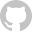
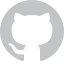
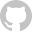
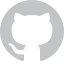
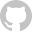
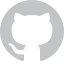
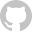
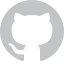
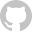
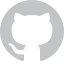
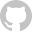
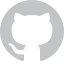
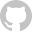
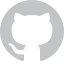
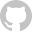
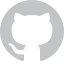
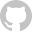
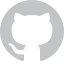
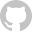
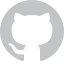
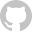
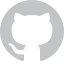
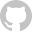
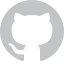
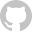
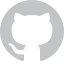
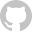
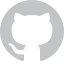
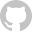
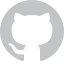
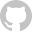
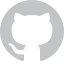
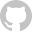
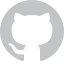
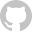
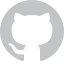
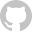
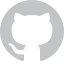
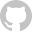
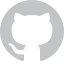
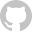
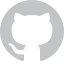
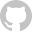
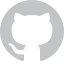
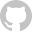
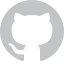
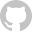
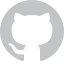
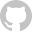
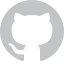
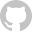
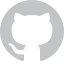
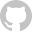
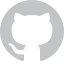
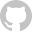
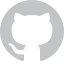
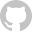
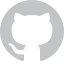
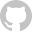
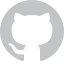
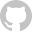
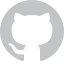
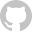
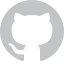

In [30]:
from firecrawl.firecrawl import FirecrawlApp
FIRECRAWL_API_KEY = os.getenv("FIRECRAWL_API_KEY")
app = FirecrawlApp(api_key=FIRECRAWL_API_KEY)

# Scrape a website:
scrape_status = app.scrape_url(
  url, 
  params={'formats': ['markdown', 'html']}
)
print(scrape_status)

# Crawl a website (scrape also all the links in it):
crawl_status = app.crawl_url(
  url, 
  params={
    'limit': 100, 
    'scrapeOptions': {'formats': ['markdown', 'html']}
  },
  poll_interval=30
)
print(crawl_status) #±35 secs for approx. 58 pages

In [31]:
display(Markdown(scrape_status['markdown']))

These guides are an initiative from TU Delft [Digital Competence Centre](https://tu-delft-dcc.github.io/docs/community/dcc.html)
 and aim to provide a comprehensive entrypoint to get you started with Research Computing, Research Data, and Research Software at TU Delft.

**Disclaimer**

The guides are under active development and mainly in use as a useful resource for the support provided by the DCC. The content is a compilation of developed solutions, relevant links and resources, and documents produced by colleagues inside and outside TU Delft. This is not an official TU Delft website, but rather a place where we keep note of things we find important and useful to share.

The guides are split into a few major sections:

*   **Computing Infrastructure** contains information and guides on TU Delft ICT infrastructure.
*   **Data Management** contains information and guides on using TU Delft data storage options and best-practices for FAIR data.
*   **Research Software** contains information for creating FAIR research software.
*   **Resources** contains a collection of courses, workshops, and references.

**Learn more and get involved**

🙌 [**Join the community**](https://tu-delft-dcc.github.io/CONTRIBUTING.html)
  
We welcome anyone to join us in improving our guides. To join, check out our [contributing guide](https://tu-delft-dcc.github.io/CONTRIBUTING.html)
.

💬 [**Join the discussion**](https://github.com/TU-Delft-DCC/TU-Delft-DCC.github.io/discussions)
  
We have community discussions, talk about ideas, share general questions and develop solutions and feedback in our [community forum](https://github.com/TU-Delft-DCC/TU-Delft-DCC.github.io/discussions)
.

💡 [**Open an issue**](https://github.com/TU-Delft-DCC/TU-Delft-DCC.github.io/issues/new/choose)
  
We track topic requests and bug-reports via GitHub issues.

[{'markdown': 'Coming soon!',
  'html': '<!DOCTYPE html><html xmlns="http://www.w3.org/1999/xhtml" lang="en" xml:lang="en">\n\n<body class="nav-fixed">\n\n<div id="quarto-search-results"></div>\n  \n<!-- content -->\n<div id="quarto-content" class="quarto-container page-columns page-rows-contents page-layout-article page-navbar">\n<!-- sidebar -->\n<!-- margin-sidebar -->\n    \n<!-- main -->\n<main class="content" id="quarto-document-content">\n\n\n\n\n<p>Coming soon!</p>\n\n\n\n</main> <!-- /main -->\n\n</div> <!-- /content -->\n\n\n\n\n\n\n</body></html>',
  'metadata': {'title': 'Research Support Staff Guide',
   'language': 'en',
   'viewport': 'width=device-width, initial-scale=1.0, user-scalable=yes',
   'generator': 'quarto-1.5.57',
   'sourceURL': 'https://tu-delft-dcc.github.io/docs/tud-support/index.html',
   'quarto:offset': '../../',
   'ogLocaleAlternate': [],
   'statusCode': 200}},
 {'markdown': 'About the DCC\n=============\n\nThe TU Delft Digital Competence Centre (DC
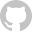
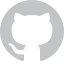
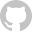
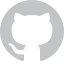
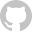
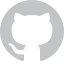
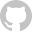
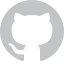
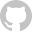
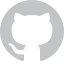
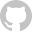
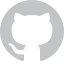
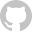
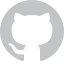
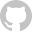
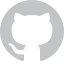
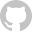
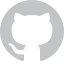
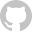
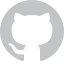
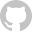
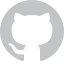
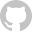
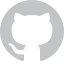
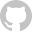
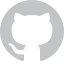
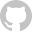
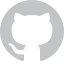
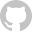
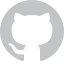
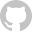
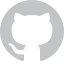
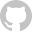
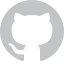
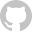
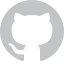
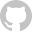
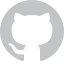
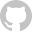
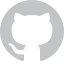
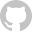
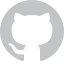
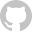
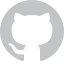
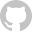
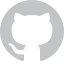
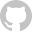
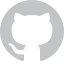
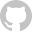
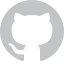
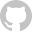
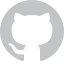
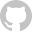
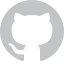
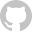
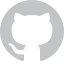
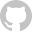
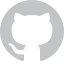
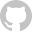
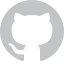
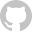
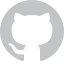
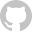
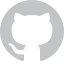

In [33]:
crawl_status['data'] #All pages and links of them - each of them one page scraped

In [10]:
display(Markdown(crawl_status['data'][8]['markdown']))

Docker is an open platform for developing, shipping, and running applications. Docker provides the ability to package and run an application in a loosely isolated environment called a container. Containers are lightweight and contain everything needed to run the application, so you do not need to rely on what is currently installed on the host system. You can easily share containers while you work, and be sure that everyone you share with gets the same container that works in the same way.

![](https://user-images.githubusercontent.com/15414938/123805382-52543b00-d8ee-11eb-8f76-ae598d6fdb83.png)

**Dockerfile** – is a text document that contains all the commands you would normally execute manually in order to build a Docker image. The instructions include a choice of operating system and all the libraries we need to install into it. Docker can build images automatically by reading the instructions from a Dockerfile.  
**Docker Images** – are the basis of containers. A Docker image is an immutable (unchangeable) file that contains the source code, libraries, dependencies, tools, and other files needed for an application to run.  
**Docker Container** – A container is, ultimately, just a running image.

Docker installation[](#docker-installation)

--------------------------------------------

Docker can be installed on Windows, macOS, and Linux. Please visit the [Docker website](https://docs.docker.com/get-docker/)
 for downloading and installation instructions. Note, you will need admin access to your system.

**Please check the Issues/troubleshooting session at the end of this page if you encounter some problems during installation. If your problem is not listed you can add it as an issue in the main repository.**

### Verify Docker installation[](#verify-docker-installation)

Run the following commands in the terminal (see below) to verify your installation:

*   `docker --version`  
    Will output the version number
*   `docker run hello-world`  
    Will output a welcome message. If you haven’t run this command before, you will receive the message _Unable to find image: ‘hello-world:latest’ locally_. Docker will then proceed by downloading and running the latest version from [DockerHub](https://hub.docker.com/_/hello-world)
    .

Terminal access[](#terminal-access)

------------------------------------

**Linux**  
The default Unix Shell for Linux operating systems is usually Bash. On most versions of Linux, it is accessible by running the [(Gnome) Terminal](https://help.gnome.org/users/gnome-terminal/stable/)
 or [(KDE) Konsole](https://konsole.kde.org/)
 or [xterm](https://en.wikipedia.org/wiki/Xterm)
, which can be found via the applications menu or the search bar. If your machine is set up to use something other than bash, you can run it by opening a terminal and typing `bash`.

**macOS**  
For a Mac computer, the default Unix Shell is Bash, and it is available via the Terminal Utilities program within your Applications folder. To open Terminal, try one or both of the following:

*   Go to your Applications. Within Applications, open the Utilities folder. Locate Terminal in the Utilities folder and open it.
*   Use the Mac ‘Spotlight’ computer search function. Search for: Terminal and press Return.

For more info: [How To use a terminal on Mac](https://www.macworld.co.uk/how-to/how-use-terminal-on-mac-3608274/)

**Windows**  
Computers with Windows operating systems do not automatically have a Unix Shell program installed. We encourage you to use an emulator included in [Git for Windows](https://gitforwindows.org/)
, which gives you access to both Bash shell commands and Git. To install, please follow these [instructions](https://coderefinery.github.io/installation/git-in-terminal/#git-in-terminal)
.

X Windows System[](#x-windows-system)

--------------------------------------

Docker doesn’t have any build-in graphics, which means it cannot run desktop applications by default. For this, we require the X Windows System. The X Window System (X11, or simply X) is a windowing system for bitmap displays, common on Unix-like operating systems. X provides the basic framework for a GUI environment: drawing and moving windows on the display device and interacting with a mouse and a keyboard.

If you are on a desktop Linux, you already have one. For macOS, you can download [XQuartz](https://www.xquartz.org/)
, and for Windows, we tested [VcXsrv](https://sourceforge.net/projects/vcxsrv/)
.

Desktop applications will run in Docker and will try to communicate with the X server you’re running on your PC. They don’t need to know anything but the location of the X server and an optional display that they target. This is denoted by an environmental variable named `DISPLAY`, with the following syntax: `DISPLAY=xserver-host:0`. The number you see after the `:` is the display number; for the intents and purpose of this article, we will consider this to be equivalent to _0 is the primary display attached to the X server_.

In order to set up the environment variable, we need to add the following code to the `docker run` command in the terminal:

*   Windows
*   macOS
*   Linux

`-e DISPLAY=host.docker.internal:0`

`-e DISPLAY=docker.for.mac.host.internal:0`

`--net=host -e DISPLAY=:0`

With these commands (and an active X server on the host system), any graphical output inside the container will be shown on your own desktop.

Mount a volume[](#mount-a-volume)

----------------------------------

The docker image with which you can spawn a container contains all the software and general datafiles. However, we still need to give the container access to your dataset. To do so, we can mount a directory on your own system inside the container with the following command structure: `-v <abs_path_host>:<abs_path_container>`. Assuming your terminal is opened inside the data folder on your system, the specific commands for the different operating systems mount this folder as the `/data` folder inside the container, are:

For Windows in GitBash: `-v /$(pwd):/data`  
For Windows in cmd: `-v %cd%:/data`  
For Linux and macOS: `-v $(pwd):/data`

`$(pwd)` can be replaced with the absolute path of the datafolder, or be used to access subdirectories (e.g. `$(pwd)/data:/data`).

For more info about mounting volumes, check this [StackOverflow question](https://stackoverflow.com/questions/41485217/mount-current-directory-as-a-volume-in-docker-on-windows-10)

Running a container with data and graphical output[](#running-a-container-with-data-and-graphical-output)

----------------------------------------------------------------------------------------------------------

To start a container from an image, we use the command `docker run <image_name>`. We also pass the additional flags `--rm` to delete the container after closing and `-it` to be able to interact with the container. Combining all arguments then leads to the following commands to run (and automatically close) the container:

*   Windows
*   macOS
*   Linux

`docker run --rm -it -e DISPLAY=host.docker.internal:0 -v /$(pwd):/data <image_name>:<image_version>`

`docker run --rm -it -e DISPLAY=docker.for.mac.host.internal:0 -v $(pwd):/data <image_name>:<image_version>`

`docker run --rm -it --net=host -e DISPLAY=:0 -v $(pwd):/data <image_name>:<image_version>`

Issues/Troubleshooting[](#issuestroubleshooting)

-------------------------------------------------

*   For Linux users encountering the error _Unable to init server_, please run `xhost +` in the terminal and rerun the `docker run` command. For more info, see [here](https://www.thegeekstuff.com/2010/06/xhost-cannot-open-display/)
    .
*   **WSL 2 installation incomplete for Windows users**
    *   Enable the virtualization in the BIOS
    *   Follow ALL the steps described in: https://docs.microsoft.com/en-us/windows/wsl/install-manual
*   Failing to port a display in the docker container for Mac users.
    *   Solution: Change the docker run command by this one , `docker run --rm -it -e DISPLAY=IPADDRESS:0 -v $(pwd):/data <image_name>:<image_version>`
    *   The _IPADDRESS_ is gotten from typing `ifconfig` in the terminal.
*   Failing to run the pipeline once the GUI is open
    *   Check that all documents are closed before run it , namely the _Getting started_ and the _adapter files_ documents.
*   Failing to mount an external hard drive in Windows when running a docker container
    
    *   Error:
    
              libGL error: No matching fbConfigs or visuals found
              libGL error: failed to load driver: swrast
    
    *   Solution (noy yet found):
*   Look into this links:
    *   https://stackoverflow.com/questions/46586013/glxgears-not-working-inside-of-docker